In [4]:
# Initial imports
import pandas as pd
import numpy as np

from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [5]:
# Loading data
df = pd.read_csv("Developed_nations.csv")
df.head()

Country  Year  Happiness Score  Log GDP per capita  Social support  \
0  Argentina  2010            6.441              10.066           0.927   
1  Argentina  2011            6.776              10.112           0.889   
2  Argentina  2012            6.468              10.091           0.902   
3  Argentina  2013            6.582              10.103           0.910   
4  Argentina  2014            6.671              10.067           0.918   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             66.30                         0.730      -0.129   
1                             66.42                         0.816      -0.178   
2                             66.54                         0.747      -0.151   
3                             66.66                         0.737      -0.134   
4                             66.78                         0.745      -0.168   

   Perceptions of corruption  CPI %  Unemployment Rate         region  \
0                      0.855    0.0               7.71  South America   
1                      0.755    0.0               7.18  South America   
2                      0.817    0.0               7.22  South America   
3                      0.823    0.0               7.10  South America   
4                      0.854    0.0               7.27  South America   

  Development_Status  
0          Developed  
1          Developed  
2          Developed  
3          Developed  
4          Developed

In [6]:
df.dtypes

Country                              object
Year                                  int64
Happiness Score                     float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
CPI %                               float64
Unemployment Rate                   float64
region                               object
Development_Status                   object
dtype: object

In [7]:
# Apply one-hot encoding to the 'region' column
data = pd.get_dummies(df, columns=['region','Development_Status'])

In [8]:
# Check the unique values in your 'Development_Status_Developed' column
#print(data['Development_Status'].unique())

# If it contains non-numeric values, you can map them to 0 and 1
#data['Development_Status'] = data['Development_Status'].map({'Developed': 1, 'OtherCategory': 0})

In [9]:
 # Define features set
X = data.drop(["Happiness Score", "Country"], axis=1)

X.head()

Year  Log GDP per capita  Social support  Healthy life expectancy at birth  \
0  2010              10.066           0.927                             66.30   
1  2011              10.112           0.889                             66.42   
2  2012              10.091           0.902                             66.54   
3  2013              10.103           0.910                             66.66   
4  2014              10.067           0.918                             66.78   

   Freedom to make life choices  Generosity  Perceptions of corruption  CPI %  \
0                         0.730      -0.129                      0.855    0.0   
1                         0.816      -0.178                      0.755    0.0   
2                         0.747      -0.151                      0.817    0.0   
3                         0.737      -0.134                      0.823    0.0   
4                         0.745      -0.168                      0.854    0.0   

   Unemployment Rate  region_Asia  region_Australian and Oceania  \
0               7.71            0                              0   
1               7.18            0                              0   
2               7.22            0                              0   
3               7.10            0                              0   
4               7.27            0                              0   

   region_Eastern Europe  region_Middle East  region_North America  \
0                      0                   0                     0   
1                      0                   0                     0   
2                      0                   0                     0   
3                      0                   0                     0   
4                      0                   0                     0   

   region_South America  region_Western Europe  Development_Status_Developed  
0                     1                      0                             1  
1                     1                      0                             1  
2                     1                      0                             1  
3                     1                      0                             1  
4                     1                      0                             1

In [10]:
 # Define target vector
y = df["Happiness Score"].ravel()
y[:5]

array([6.441, 6.776, 6.468, 6.582, 6.671])

In [11]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Creating StandardScaler instance
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on your training data (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (X_test) using the same scaler
X_test_scaled = scaler.transform(X_test)

In [13]:
import numpy as np

# Define threshold values
low_happiness_threshold = 5.0
medium_happiness_threshold = 6.0
high_happiness_threshold = 7.0

# Create a function to categorize Happiness Score
def categorize_happiness(score):
    if score < low_happiness_threshold:
        return 'Low Happiness'
    elif score < medium_happiness_threshold:
        return 'Medium Happiness'
    elif score < high_happiness_threshold:
        return 'High Happiness'

# Use NumPy vectorized operations to categorize the Happiness Score
y_category = np.vectorize(categorize_happiness)(y)



In [18]:
# Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor instance
rf_regressor = RandomForestRegressor(random_state=42)  # You can set your desired random_state

# Fit the regressor on your training data
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test_scaled)



In [19]:
y_pred


array([6.29895, 6.2826 , 7.27347, 6.28161, 7.38244, 6.16921, 7.47572,
       7.53518, 5.65054, 6.96763, 6.91613, 7.3752 , 7.51582, 6.73777,
       5.17835, 7.24966, 7.33559, 6.9331 , 7.28326, 6.69374, 6.95646,
       6.90508, 7.06514, 5.19482, 5.42284, 5.59874, 5.05599, 7.10906,
       5.39112, 6.14654, 5.92241, 5.56443, 5.78973, 7.57247, 5.99547,
       6.4    , 6.4851 , 6.36996, 6.97238, 6.0784 , 4.87001, 5.31681,
       6.91073, 7.34998, 7.50018, 6.71352, 5.0388 , 6.18697, 5.81644,
       6.92505, 6.04866, 6.04153, 6.51489, 7.49588, 6.11987, 6.96229,
       6.34829, 5.79044, 6.05624, 5.83093, 6.90573, 6.48607, 5.2119 ,
       6.52834, 5.60589, 6.99888, 7.46559, 5.49719, 5.97276, 6.15676,
       6.45979, 6.86645, 7.34262, 7.07761, 6.18887, 7.01707, 7.43054,
       7.21416, 7.52158, 6.43591, 6.84193, 7.42888, 7.44948, 6.49084,
       7.44708, 5.71383, 5.41649, 7.49707, 7.10243, 6.71004, 7.10446,
       6.96677, 5.75031, 7.64895, 6.16182, 7.20504, 6.1221 , 6.52244,
       6.96514, 5.95

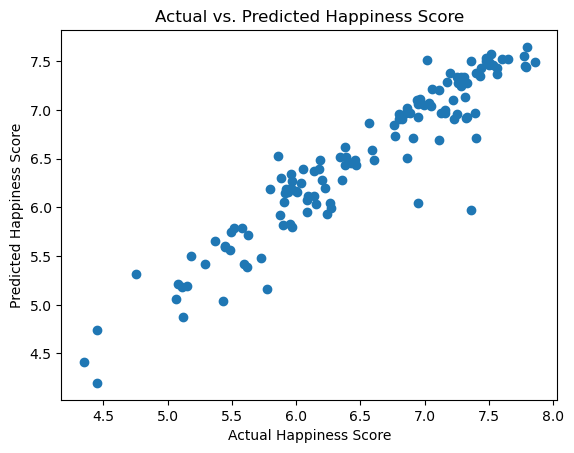

Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.27
R-squared (R2): 0.89


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate prediction errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a scatter plot for visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs. Predicted Happiness Score")
plt.show()

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


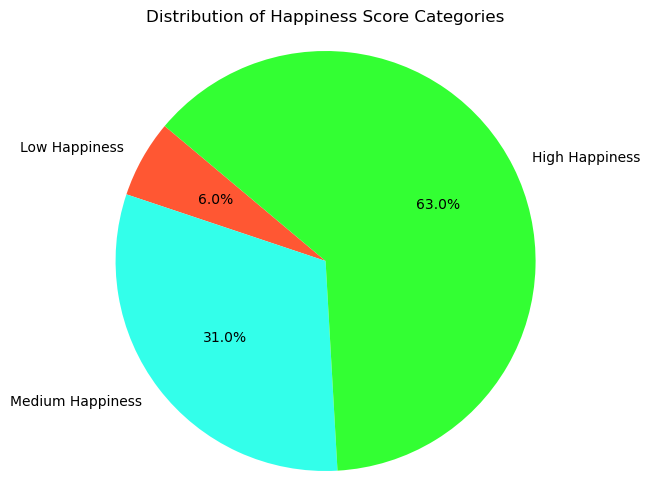

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have categorized your Happiness Scores and stored them in y_category (a NumPy array)
# Define the categories
categories = ['Low Happiness', 'Medium Happiness', 'High Happiness']

# Count the occurrences of each category
category_counts = [np.count_nonzero(y_category == category) for category in categories]

# Define custom colors for the pie chart
colors = ['#FF5733', '#33FFEA', '#33FF33']

# Create a pie chart
plt.figure(figsize=(8, 6))

# Use autopct to add percentage labels to the slices
plt.pie(category_counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title("Distribution of Happiness Score Categories")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
